## 6.1 로지스틱 회귀분석

이름은 회귀분석이라고 붙어 있는데, 실제로는 회귀+분류 문제. <br>
예전에 선형회귀 풀때, <br>
- $y|x$의 분포는 중심값이 x값에 의존하는 정규분포 따른다고 가정했었음. 
- 그렇다면, y는 -무한대부터, +무한대까지 가질 수 있다. 
- 그런데, 실제로는 y값이 밑으로나 위로 막혀있거나 정수값만 가질 수 있거나 이런 케이스들이 있다. 
- Logistic Regression에서는 y값이 Binomial을 따른다고 가정한다. 0~N까지의 정수값을 가질 수 있다. 


로지스틱(Logistic) 회귀분석은 회귀분석이라는 명칭과 달리 회귀분석 문제와 분류문제 모두에 사용할 수 있다. 로지스틱 회귀분석 모형에서는 종속변수가 이항분포를 따르고 그 모수 $\mu$가 독립변수 $x$에 의존한다고 가정한다.

$$ p(y \mid x) = \text{Bin} (y; \mu(x), N) $$

위 식에서 보듯이 로지스틱 함수는 $y$의 값이 특정한 구간내의 값($0 \sim N$)만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우에 회귀분석 방법으로 쓸 수 있다.  

또는 이항 분포의 특별한 경우($N=1$)로 $y$가 베르누이 확률분포인 경우도 있을 수 있다. 여기에서는 베르누이 확률분포를 따르는 로지스틱 회귀분석만 고려하기로 한다.

$$ p(y \mid x) = \text{Bern} (y; \mu(x) )$$

종속변수 $y$가 0또는 1인 분류 예측 문제를 풀 때는 $x$ 값을 이용하여 $\mu(x)$를 예측한 후 다음 기준에 따라 $\hat{y}$값을 출력한다. 이때 이 $\mu$가 x에 따라서 바뀐다. 이것은 선형회귀에서도 마찬가지였었지($ y \sim \mathcal{N}(w^Tx, \sigma^2) $). 로지스틱에서도 mu는 x에 따라 바뀐다. 

$$ \hat{y} = \begin{cases} 1 & \text{ if } \mu(x) \geq 0.5 \\ 0 & \text{ if } \mu(x) < 0.5 \end{cases} $$

회귀분석을 할 때는 $\hat{y}$으로 $y=1$이 될 확률값 $\mu(x)$를 직접 사용한다. 실제로 문제중에 0~1까지밖에 안되는 회귀분석 문제에서는 이 $\mu$를 직접 쓰기도 한다.

$$ \hat{y} = \mu(x) $$

### 시그모이드함수

로지스틱 회귀모형에서는 베르누이 확률분포의 모수 $\mu$가 $x$의 함수라고 가정한다(선형회귀에서도 마찬가지였음 $\mu=w^Tx$). $\mu(x)$는 $x$에 대한 함수를 0부터 1사이의 값만 나올 수 있도록(1이 나올 확률) **시그모이드함수(sigmoid function)** 라는 함수를 사용하여 변형한 것을 사용한다.

시그모이드 라는 말 자체가 S-like(S자와 닮았다), 그냥 이 의미임.

시그모이드함수는 종속변수의 모든 실수 값에 대해(아래 두 조건 만족하면, 모두 다 시그모이드 함수임)

* 유한한 구간 $(a,b)$ 사이의 한정된(bounded) 값을 가지고
$$ a < f(x) < b $$
* 항상 양의 기울기를 가지는 단조증가하는
$$ a > b \; \rightarrow \; f(a) > f(b) $$

함수의 집합을 말한다. 실제로는 다음과 같은 함수들이 주로 사용된다.

 * 로지스틱(Logistic)함수(sigmoid라고 하면 99.9% 이것을 의미한다 보통은) 
 
$$ \text{logitstic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}} $$
 
 * 하이퍼볼릭탄젠트(Hyperbolic tangent)함수 
 
$$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac{(e^z - e^{-z})/2}{(e^z + e^{-z})/2} = 2 \sigma(2z) - 1$$

 * 오차(Error)함수
 
$$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$
 

하이퍼볼릭탄젠트함수는 로지스틱함수를 위아래 방향으로 2배 늘리고 좌우 방향으로 1/2로 축소한 것과 같다. 

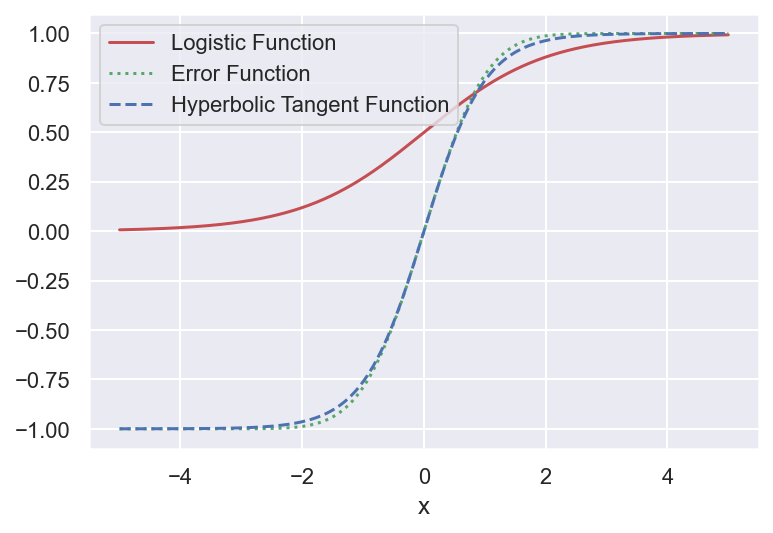

In [8]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="Logistic Function")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="Error Function")
plt.plot(xx, np.tanh(xx), 'b--', label="Hyperbolic Tangent Function")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

![1_66.jpeg](./materials/1_66.jpeg)

### 로지스틱함수

![1_67.jpeg](./materials/1_67.jpeg)

로지스틱함수는 음의 무한대부터 양의 무한대까지의 실수값을 0부터 1사이의 실수값으로 1 대 1 대응시키는 시그모이드함수다. 보통 시그모이드함수라고 하면 로지스틱함수를 가리킨다. 로지스틱함수는 다음 과정을 통해 정의되었다.

베르누이 시도에서 1이 나올 확률 $\mu$와 0이 나올 확률 $1-\mu$의 비율(ratio)을 승산비(odds ratio)라고 한다.

$$ \text{odds ratio} = \dfrac{\mu}{1-\mu} $$

0부터 1사이의 값만 가지는 $\mu$를 승산비로 변환하면 0부터 양의 무한대까지의 값을 가질 수 있다.

승산비를 로그 변환한 것이 로지트함수(Logit function)다.

$$ z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\mu}{1-\mu}\right) $$ 

로지트함수의 값은 로그 변환에 의해 음의 무한대($-\infty$)부터 양의 무한대($\infty$)까지의 값을 가질 수 있다.

로지스틱함수(Logistic function)는 로지트함수의 역함수이다. 즉 **음의 무한대($-\infty$)부터 양의 무한대($\infty$)까지의 값을 가지는 입력변수를 0부터 1사의 값을 가지는 출력변수로 변환**한 것이다.

$$ \text{logitstic}(z) = \mu(z) = \dfrac{1}{1+\exp{(-z)}} $$  

$\mu$를 이진분류 쓸때는, 0.5기준 1,0을 판단. <br>
0.5가 될때는, z=0일때. 등등 하단 참고. 

### 선형 판별함수

로지스틱함수 $\sigma(z)$를 사용하는 경우에는 $z$값과 $\mu$값은 다음과 같은 관계가 있다.

* $z = 0$일 때 $\mu = 0.5$
* $z > 0$일 때 $\mu > 0.5 \; \rightarrow \hat{y} = 1$
* $z < 0$일 때 $\mu < 0.5 \; \rightarrow \hat{y} = 0$

즉 $z$가 분류 모형의 ***판별함수(decision function)***의 역할을 한다. 로지스틱 회귀분석에서는 판별함수 수식으로 선형함수를 사용한다.

$$ z = w^Tx  $$

따라서 판별 경계면도 선형이 된다.

그럼 z에 무엇을 넣느냐? x에 대한 선형함수를 넣는다. $ z = w^Tx  $ <br>
즉, z가 판별함수인데 z에 x에 대한 선형함수를 넣는다? <br>
로지스틱의 ***영역 경계면***은 선형이 된다는 것. <br>
- *영역경계면 : x들을 각 면에 그려놓고 구분해주는 선/면*

![1_68.jpeg](./materials/1_68.jpeg)

이제 w만 찾아내면 돼. 그게 다야. 

### 로지스틱 회귀분석 모형의 모수 추정

로지스틱 회귀분석 모형의 모수 $w$는 최대가능도(Maximum Likelihood Estimation, MLE)방법으로 추정할 수 있다.

우선 베르누이분포의 확률밀도함수는 다음과 같다.

$$ p(y \mid x) = \text{Bern} (y;\mu(x;w) ) = \mu(x;w)^y ( 1 - \mu(x;w) )^{1-y} $$

$\mu$는 $w^Tx$에 로지스틱함수를 적용한 값이다.

$$
\mu(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}
$$

이 식을 대입하면 조건부 확률은 다음과 같다.

$$ 
\begin{eqnarray}
p(y \mid x) 
&=& \left(  \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^y \left(  1 - \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^{1-y} \\
&=& \left(  \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^y \left( \dfrac{\exp{(-w^Tx)}}{1 + \exp{(-w^Tx)}} \right) ^{1-y} \\
\end{eqnarray}
$$


데이터 표본이 $\{ x_i, y_i \}_{1:N}$로 여러 개 있는 경우 전체 데이터의 로그가능도 ${LL}$를 구하면 다음과 같다.

베르누이 확률분포의 정의에서

$$
\begin{eqnarray}
{LL} 
&=& \log \prod_{i=1}^N \mu(x_i;w)^{y_i} (1-\mu(x_i;w))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\mu(x_i;w) +  (1-y_i)\log(1-\mu(x_i;w)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) + (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}
$$

가 된다.


로그가능도를 최대화하는 $w$ 값을 구하기 위해 모수로 미분한다.

$$ \dfrac{\partial{LL}}{\partial w}  = \sum_{i=1}^N \dfrac{\partial{LL}}{\partial \mu(x_i;w)} \dfrac{\partial\mu(x_i;w)}{\partial w} $$

$LL$을 $\mu$로 미분하면

$$
\dfrac{\partial{LL}}{\partial \mu(x_i;w)} =  \left( y_i \dfrac{1}{\mu(x_i;w)} - (1-y_i)\dfrac{1}{1-\mu(x_i;w)} \right) 
$$

$\mu$를 $w$로 미분하면

$$ 
\dfrac{\partial \mu(x_i;w)}{\partial w} 
= \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx_i)}} \ 
= \dfrac{\exp{(-w^Tx_i)}}{(1 + \exp{(-w^Tx_i)})^2} x_i \ 
= \mu(x_i;w)(1-\mu(x_i;w)) x_i 
$$


두 식을 곱하면 그레디언트 벡터의 수식을 구할 수 있다.

$$ 
\begin{eqnarray}
\dfrac{\partial {LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\mu(x_i;w)} - (1-y_i)\dfrac{1}{1-\mu(x_i;w)} \right) \mu(x_i;w)(1-\mu(x_i;w)) x_i   \\
&=& \sum_{i=1}^N \big( y_i (1-\mu(x_i;w)) - (1-y_i)\mu(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \mu(x_i;w) \big) x_i \\
\end{eqnarray}
$$

그레디언트 벡터가 영벡터가 되는 모수의 값이 로그가능도를 최대화하는 값이다. 하지만 그레디언트 벡터 수식이 $w$에 대한 비선형 함수이므로 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수 $w$ 값에 대한 수식을 구할 수 없으며 수치적인 최적화 방법(numerical optimization)을 통해 반복적으로 최적 모수 $w$의 값을 구해야 한다.

위 식을 0으로 만드는 $w$값을 구하면 된다. 근데, 실제로는 손으로 풀어서 못구해. 선형회귀에서는 마지막 식이 선형대수 식으로 나와서 inverse하고 했던 것. 근데 여기서는 그렇게 계산이 안돼. 결국은 수치적 최적화밖에 못함. LL을 가장 최대화 하는 값을 찾아야 함. 

### 수치적 최적화

로그가능도함수 $LL$을 최대화하는 것은 다음 목적함수를 최소화하는 것과 같다.

$$ J = -LL $$

최대경사도(Steepest Gradient Descent)방법을 사용하자.

그레디언트 벡터는
$$
g_k = \dfrac{d}{dw}(-LL)
$$

이고, 이 방향으로 스텝사이즈 $\eta_k$만큼 이동한다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \mu(x_i; w_k) \big) x_i\\
\end{eqnarray}
$$


결국 이것은 steepest gradient descent로 밖에 안된다는 것. 

### 정규화

로지스틱 회귀에서도 과최적화를 방지하기 위해 릿지, 라소, 일레스틱넷 방식의 정규화 팬러티를 목적함수인 로그가능도 함수에 추가할 수 있다. 

### StatsModels 패키지의 로지스틱 회귀

로지스틱 회귀는 **Likelihood**를 최대화 한다는 것을 항상 기억하자. 

다음과 같은 1차원 독립변수를 가지는 분류문제를 풀어보자.

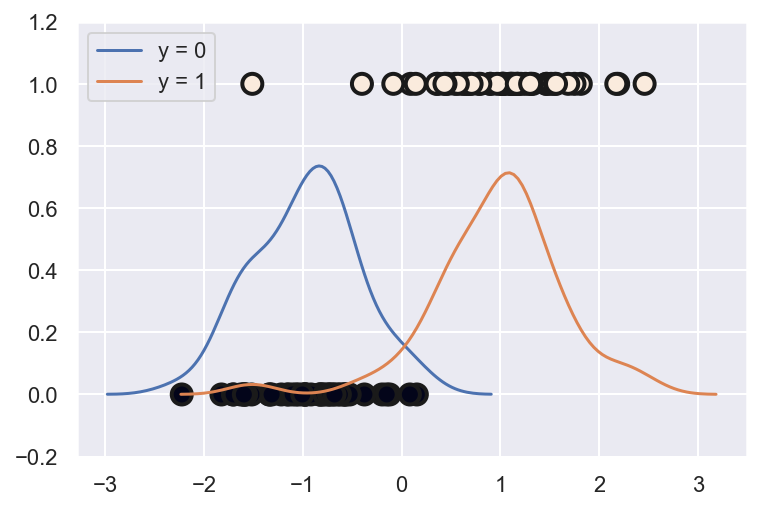

In [2]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

StatsModels 패키지는 베르누이 분포를 따르는 로지스틱 회귀 모형 `Logit` 를 제공한다. 사용방법은 `OLS` 클래스 사용법과 동일하다. 종속변수와 독립변수 데이터를 넣어 모형을 만들고 `fit` 메서드로 학습을 시킨다. `fit` 메서드의 `disp=0` 인수는 최적화 과정에서 문자열 메세지를 나타내지 않는 역할을 한다.

In [9]:
# display=0? 선형회귀에서는 fitting을 할때, 선형대수 식을 푼 것. iteration하고 그런건 없었음. 
# 그런데, 여기서는 수치적 optimization을 하는 것. 몇번해서 수렴할 지 알 수가 없어. 수렴이 안될수도 있어. 
# 어떻게 optimization이 되고 있는지를 보여줄건지 안보여줄건지에 대한 인수. 

In [3]:
# 상수항 Augmentation
X = sm.add_constant(X0)

# 여기서도 OLS랑 똑같이 from_formula도 사용할 수 있다. 
logit_mod = sm.Logit(y, X)

logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Aug 2021   Pseudo R-squ.:                  0.7679
Time:                        18:34:40   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


- residual이나 f-test이런거 없어짐. 
- Log-likelihood 는 최대로 했더니 -16이 됬다는 것. 
- pseudo R-squ는 하단 설명. 
- Converged : True, 면 iteration 많이 했던 어쨋던 잘 끝났다는 소리. 

결과 객체에서 `summary` 메서드를 사용하여 리포트를 출력할 수 있다. 결과 리포트에서 판별함수의 수식이 다음과 같다는 것을 알 수 있다.

$$ 
\mu(x) = \sigma(4.2382x + 0.2515)
$$

따라서 $z$값의 부호를 나누는 기준값은 $4.2382x + 0.2515 = 0$이 되는 $x$값 즉, $-0.2515/4.2382$다. 이 기준값보다 크면 1, 낮으면 0으로 예측하면 된다는 것.

`predict` 메서드를 사용하면 $\mu(x)$값을 출력한다.



유의확률을 감안하면 상수항의 값은 0과 마찬가지이므로 $\mu(x)$가 다음과 같다고 볼 수도 있다.

$$ 
\mu(x) = \sigma(4.2382x)
$$

이렇게 생각하면 $z$값의 부호를 나누는 기준값은 실질적으로는 $0$이다.<br>

근데, 하단 predict에서는 뭐 p-value가 낮고 그런거까지 따지지는 않는다. 그냥, 위 상수항까지 따져서 predict


기준값은 logit_res.params에 들어있다. 

In [70]:
logit_res.params[0] / logit_res.params[1]

-5.41432510257189

In [10]:
sm.add_constant(xx)

array([[ 1.        , -5.        ],
       [ 1.        , -4.98998999],
       [ 1.        , -4.97997998],
       ...,
       [ 1.        ,  4.97997998],
       [ 1.        ,  4.98998999],
       [ 1.        ,  5.        ]])

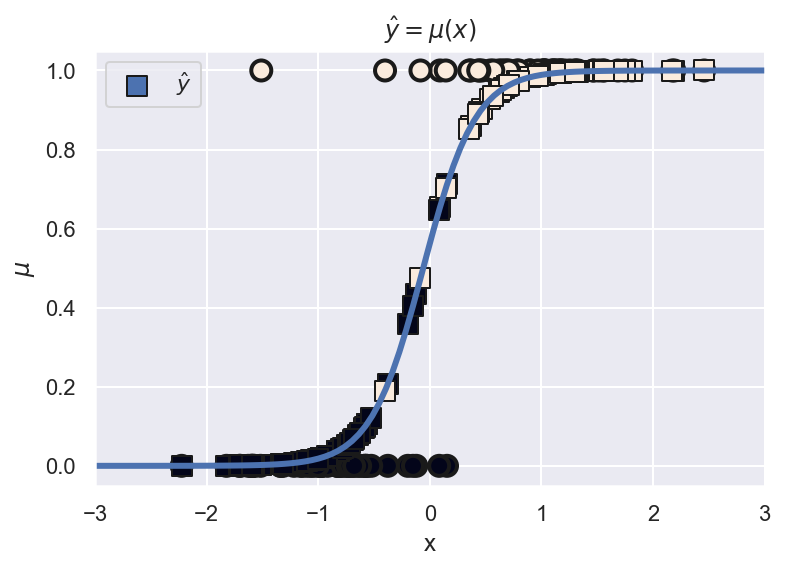

In [4]:
xx = np.linspace(-3, 3, 100)

# predict할 때도, constant항을 넣는다.
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

### 판별함수

`Logit` 모형의 결과 객체에는 `fittedvalues`라는 속성으로 판별함수 $z=w^Tx$ 값이 들어가 있다. 이 값을 이용하여 분류문제를 풀 수도 있다.

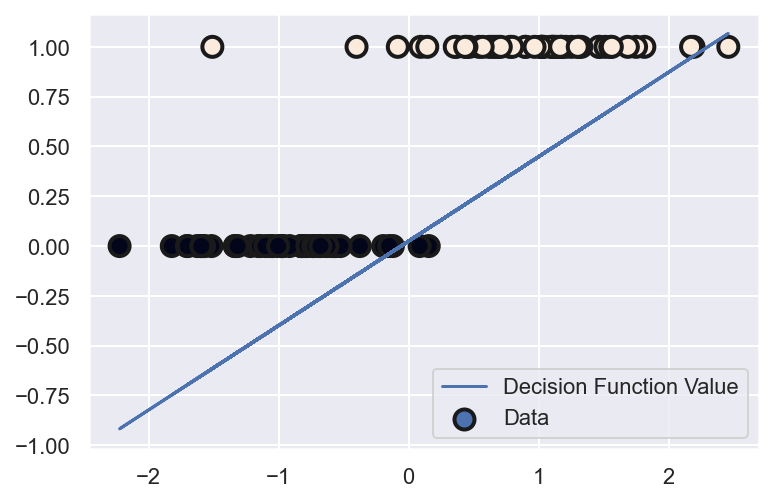

In [12]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2, label="Data")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="Decision Function Value")
plt.legend()
plt.show()

이 Decision Function Value를 이용하면, 나중에 ROC커브를 그릴 수 있다. <br>
즉, Decision Function 값 가지고, threshold를 왔다 갔다 하면서 ROC커브를 그리던 것 이였어. 

### 로지스틱 회귀 성능 측정

로지스틱 회귀 성능은 맥파든 의사결정계수(McFadden pseudo R square)값으로 측정한다.

$$ R^2_{\text{pseudo}} = 1 - \dfrac{G^2}{G^2_0} $$

$G^2$는 이탈도(deviance)라고 하는 양으로 다음과 같이 정의된다(이거 사실 Cross-Entropy, Log-Loss와 똑같아 지는 거야). 

$$ G^2 = 2\sum_{i=1}^N \left( y_i\log\dfrac{y_i}{\hat{y}_i} + (1-y_i)\log\dfrac{1-y_i}{1-\hat{y}_i} \right) $$

여기에서 $\hat{y}$는 $y=1$일 확률 $\mu$를 뜻한다.

$$ \hat{y}_i = \mu(x_i) $$


이탈도는 모형이 100% 정확한 경우에는 0이 되고 모형의 성능이 나빠질수록 값이 커진다. 

또한 이탈도는 로그 가능도에 음수를 취한 값과 같다.

$$
G^2 = -LL
$$

$G^2$는 현재 이탈도이고 $G^2_0$는 귀무모형(null model)으로 측정한 이탈도다.

귀무모형이란 모든 $x$가 $y$를 예측하는데 전혀 영향을 미치지 않는 모형을 말한다. 즉, 무조건부 확률 $p(y)$에 따라 $x$에 상관없이 동일하게 $y$를 예측하는 모형을 말한다. 결국 우리가 만들 수 있는 가장 성능이 나쁜 모형이 된다.

$$ \mu_{\text{null}} = \dfrac{\text{number of $Y=1$ data}}{\text{number of all data}} $$

따라서 맥파든 의사결정계수는 가장 성능이 좋을 때는 1이 되고 가장 성능이 나쁠 때는 0이 된다.

가장 안좋은 모델은? 가장 쓸모없는 모델은? x와 상관없이 예측하는 모델. <br> 
귀무모형이란 random shuffle model. X보지 않고 그냥 무조건 한쪽으로 판단해 버리는 것. <br> 
무조건 한쪽만 판단하면? 갯수가 많은 쪽으로 판단하겠지. <br> 
즉, (Y=1의 갯수/전체 데이터)가 그냥 $\mu_{null}$이 된다. 한쪽으로 몰아버린다. <br> 
X가 뭐가 들어오든 1, 0둘중 하나로 몰아버리는 것. <br> 
<br> 

값이 0보다는 큰 어떤 값이 나오겠지. 


그럼, 맥파든 의사결정계수를 생각해보면, 
$G^2$이 가질 수 있는 값 중에서 가장 최악인 값(가장 큰 값)이 $G_{0}^2$이 되는 것. <br> 
그럼, 최악이면, $\dfrac{G^2}{G^2_0}$가 1이니깐, 일반적인 경우에는 $\dfrac{G^2}{G^2_0}$값은 항상 1보다 작아진다. <br> 
가장 작아질때는 완벽할때 0이 되지. 


즉, 이 맥파든 계수라는 것도 최악이면 0, 가장 좋으면 1이 된다. R-square랑 비슷하잖아. <br> 
그래서, pseudo R-square라고 부는 것. 사실 pseudo R-square는 이것 이외에도 여러 종류가 있음. 이것은 맥파든이라는 사람이 정의한 것. 

scikit-learn 패키지의 metric 서브패키지에는 로그 손실을 계산하는 `log_loss` 함수가 있다. `normalize=False`로 놓으면 이탈도와 같은 값(정확히 같은 값은 아니고 비례하는 값)을 구한다

<pre>
Log-Likelihood:                -16.084 
LL-Null:                       -69.295
</pre>

위에 logistic 결과표 보면, 이런 두 값이 있었다. <br>
첫번째 값이 Log-Loss: Deviance로 사용하면 되고, 그 아래가 Null model 값. 

표에서 "LLR p-value" : "Psudo R-squ가 0이다"에 대한 검정 결과이다. F-test와 비슷한 결과가 나오는 것.

위 예제에서 최적 모형의 로그 손실은 약 16.08로 계산된다.

In [6]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084355200413036

귀무 모형의 모수값을 구하면 0.51이고 이 값으로 로그 손실을 계산하면 약 69이다.

In [14]:
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [15]:
y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)

69.29471672244784

두 값을 이용하여 맥파든 의사 결정계수 값을 계산할 수 있다.

In [16]:
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7678848264170398

### Scikit-Learn 패키지의 로지스틱 회귀

Scikit-Learn 패키지는 로지스틱 회귀 모형 `LogisticRegression` 를 제공한다. 

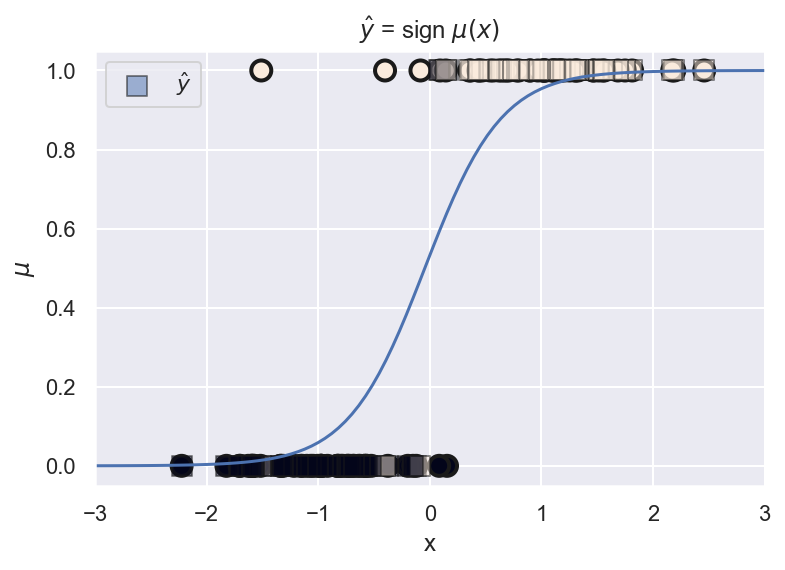

In [17]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))
plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, model_sk.predict(X0), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1, alpha=0.5)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y}$ = sign $\mu(x)$")
plt.legend()
plt.show()

사이킷런은 Predict하면 0 or 1로 분류까지 마쳐서 출력을 한다.

#### 연습 문제 1

1. 붓꽃 분류문제에서 클래스가 세토사와 베르시칼라 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 이 보고서에서 어떤 값이 세토사와 베르시칼라를 구분하는 기준값(threshold)으로 사용되고 있는가?
2. 위 결과를 분류결과표(confusion matrix)와 분류결과보고서(classification report)로 나타내라.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 `LogisticRegression`을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

문제 조건 : StatsModels 사용하기

In [20]:
from sklearn.datasets import load_iris

In [49]:
iris.feature_names[0]

'sepal length (cm)'

In [50]:
iris = load_iris()
X = iris.data[idx, 0]
y = iris.target[idx]

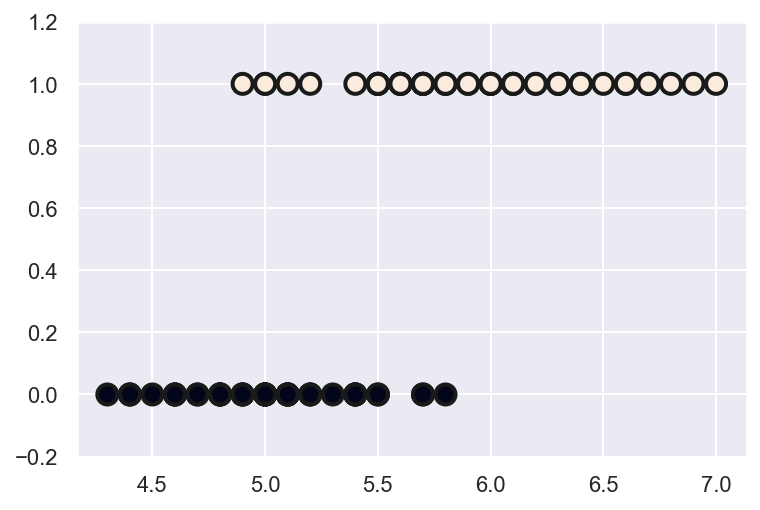

In [54]:
plt.scatter(X, y, c=y, s=100, edgecolor="k", linewidth=2)
# sns.distplot(y[y == 0], label="y = 0", hist=False)
# sns.distplot(y[y == 1], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

Logistic Regression Table

In [55]:
# 상수항 Augmentation
X_cons = sm.add_constant(X)

# 여기서도 OLS랑 똑같이 from_formula도 사용할 수 있다. 
logit_mod = sm.Logit(y, X_cons)

logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Aug 2021   Pseudo R-squ.:                  0.5368
Time:                        22:02:21   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix

pred = logit_res.predict(X_cons)
confusion_matrix(y, np.where(pred<0.5,0,1))

array([[45,  5],
       [ 6, 44]])

Decision Threshold

-27.8315 + 5.1403*x = 0

In [68]:
27.8315 /5.1403

5.414372701982375

In [71]:
logit_res.params[0] / logit_res.params[1]

-5.41432510257189

ROC Curve

In [62]:
from sklearn.metrics import roc_curve

# y와 decision value값만 넣어주면 알아서 뱉어준다. 
fpr, tpr, thresholds = roc_curve(y, pred)
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.02, 0.06, 0.06, 0.1 , 0.2 , 0.22, 0.28, 0.44, 0.6 , 0.68, 0.78,
        0.82, 0.9 , 0.92, 0.98, 1.  ]),
 array([0.  , 0.02, 0.06, 0.12, 0.16, 0.18, 0.22, 0.28, 0.32, 0.48, 0.52,
        0.58, 0.68, 0.78, 0.88, 0.9 , 0.9 , 0.92, 0.94, 0.98, 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  ]),
 array([1.99971161, 0.99971161, 0.99919417, 0.99865337, 0.99775044,
        0.99624436, 0.9937363 , 0.98957085, 0.9826836 , 0.95304918,
        0.92389836, 0.87894726, 0.81282396, 0.72200549, 0.60835381,
        0.48159935, 0.35716977, 0.24942093, 0.16579367, 0.1062368 ,
        0.06637193, 0.04078357, 0.02479825, 0.01498061, 0.00901385,
        0.00541059, 0.00324301]))

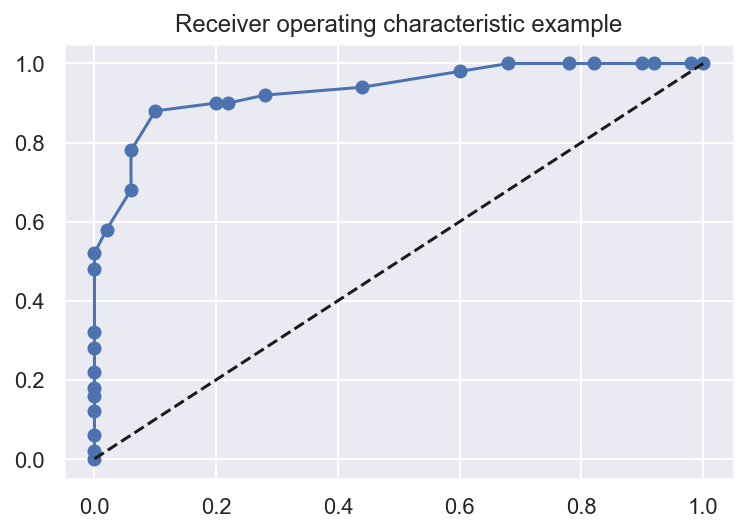

In [64]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.title('Receiver operating characteristic example')
plt.show()

AUC

In [65]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

해답

In [66]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df = df[["sepal length (cm)", "species"]]
df = df[df.species.isin([0, 1])]
df = df.rename(columns={"sepal length (cm)": "sepal_length" })

import statsmodels.api as sm

model = sm.Logit.from_formula("species ~ sepal_length", data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Aug 2021   Pseudo R-squ.:                  0.5368
Time:                        22:08:35   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

In [67]:
# 기준값
(0.5 + 27.8315) /  5.1403

5.511643289302181

In [72]:
y_pred = result.predict(df.sepal_length) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(df.species, y_pred)

array([[45,  5],
       [ 6, 44]])

In [73]:
from sklearn.metrics import classification_report

print(classification_report(df.species, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



원래는 기준을 decision value 기준 0으로 판단하는데, <br>
ROC커브를 통해 기준을 바꿔볼 수 있겠지. 

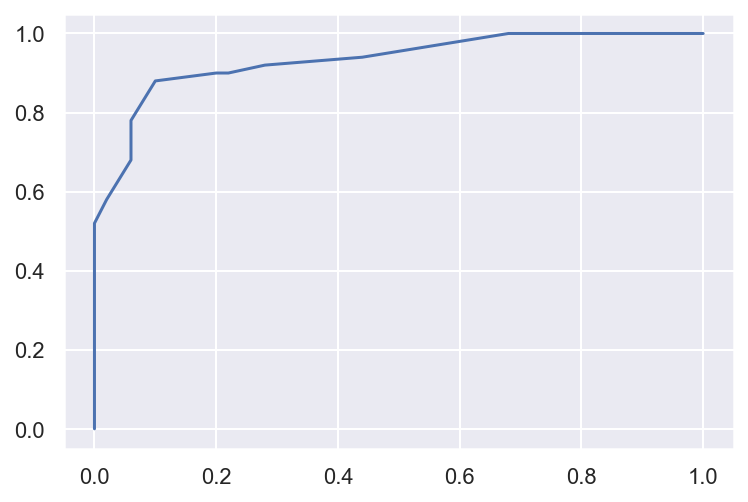

In [74]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df.species, result.predict(df.sepal_length))
plt.plot(fpr, tpr)
plt.show()

엄청 많이 하는 실수가, 위처럼 decision function value가지고, ROC커브를 그려야 되는데, predict값(0, 1)을 가지고 그림. <br>
0, 1가지고 뭘 그려. 이게 말이 되냐. 

In [75]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

### 로지스틱 회귀를 사용한 이진 분류의 예

다음 데이터는 미국 의대생의 입학관련 데이터이다. 데이터의 의미는 다음과 같다.

* `Acceptance`: 0이면 불합격, 1이면 합격
* `BCPM`: Bio/Chem/Physics/Math 과목의 학점 평균
* `GPA`: 전체과목 학점 평균
* `VR`: MCAT Verbal reasoning 과목 점수
* `PS`: MCAT Physical sciences 과목 점수
* `WS`: MCAT Writing sample 과목 점수
* `BS`: MCAT Biological sciences 과목 점수
* `MCAT`: MCAT 촘점
* `Apps`: 의대 지원 횟수

In [158]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

ERROR! Session/line number was not unique in database. History logging moved to new session 664


,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


일단 학점(GPA)과 합격여부의 관계를 살펴보자.

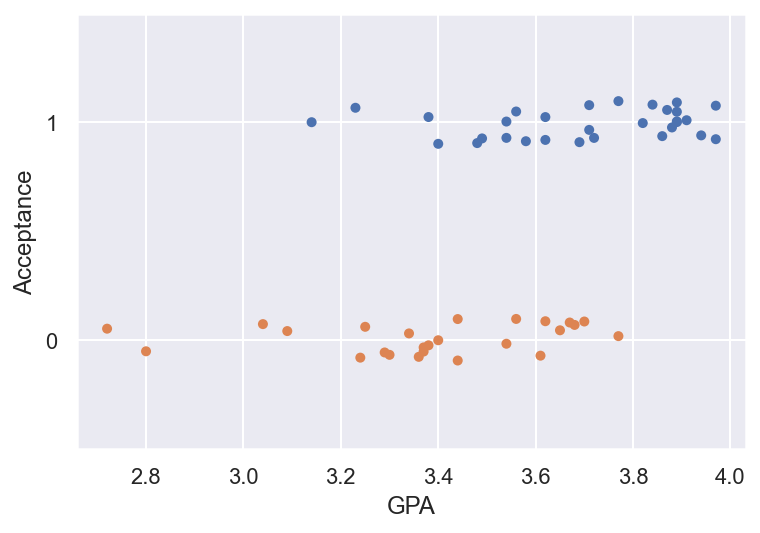

In [159]:
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

로지스틱 회귀분석을 실시한다. `MCAT = VR + PS + WS + BS`이므로 이 `MCAT`은 독립 변수에서 제외해야 한다.

In [160]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                  0.5913
Time:                        20:45:44   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

예측 결과와 실제 결과를 비교하면 다음과 같다.

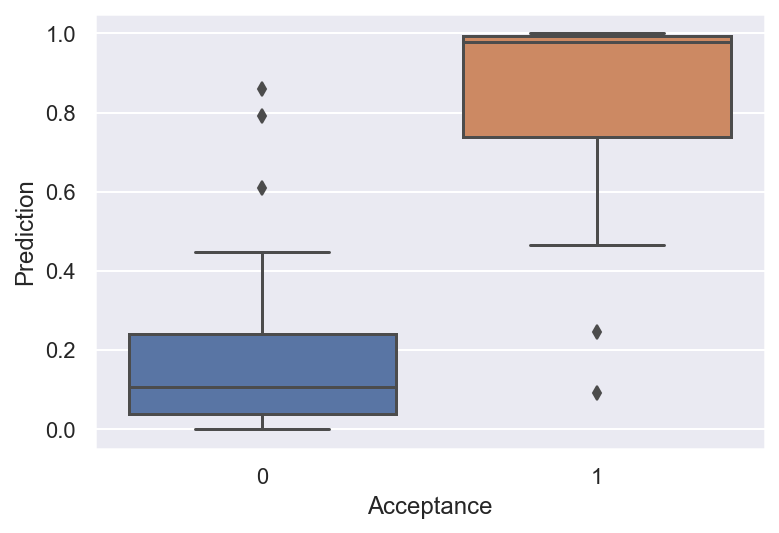

In [79]:
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()

오른쪽 보면, 실제로 합격한 사람들로 y축 prediction그려놓은 것. 대부분 0.5보다 크게 나왔네. 2개가 오분류<br>
왼쪽은 3명은 예측은 합격으로 나왔는데 실제로는 불합격으로 나옴. 

위 분석 결과를 토대로 유의하지 않은 변수들을 제외하고 PS와 BS 점수($P-value < 0.5 $)만을 이용하여 다시 회귀분석하면 다음과 같다.

In [80]:
model_med = sm.Logit.from_formula("Acceptance ~ PS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                  0.3315
Time:                        20:14:57   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

"0.4798PS+1.1464BS -15.5 > 0" 이면 합격, "<0" 이면 불합격이라는 뜻. 

위 결과를 바탕으로 다음 점수가 $15.5427$보다 크면 합격이라고 예측할 수 있다.

$$
0.4798 \text{PS} + 1.1464 \text{BS}
$$

#### 연습 문제 2

1. 붓꽃 분류문제에서 클래스가 베르시칼라(versicolor)와 버지니카(virginica) 데이터만 사용하여(versicolor=1, virginica=2) 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 독립변수는 모두 사용한다. 이 보고서에서 버지니카와 베르시칼라를 구분하는 경계면의 방정식을 찾아라.
2. 위 결과를 분류결과표와 분류결과보고서로 나타내라.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구하라.  이 때 Scikit-Learn의 `LogisticRegression`을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [136]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [137]:
idx = np.in1d(iris.target, [1, 2])

In [138]:
X = X[idx]
y = y[idx]

In [139]:
iris_df = pd.DataFrame(X, columns=["SP", "SW", "PL", "PW"])

In [140]:
iris_df["target"] = y

In [143]:
iris_df["target"]=np.where(iris_df["target"]==1, 0, 1)

In [144]:
iris_df

,SP,SW,PL,PW,target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1


In [157]:
model_iris = sm.Logit.from_formula("target ~ SP + SW + PL + PW", iris_df)
result_iris = model_iris.fit()
print(result_iris.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                  0.9142
Time:                        20:44:24   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.6378     25.708     -1.659      0.097     -93.024       7.748
SP            -2.4652      2

**경계면의 방정식**

In [147]:
result_iris.params

Intercept   -42.637804
SP           -2.465220
SW           -6.680887
PL            9.429385
PW           18.286137
dtype: float64

-42.637804 + SP*-2.465220 + SW*-6.680887 + PL*9.429385 + PW*18.286137 = 0

In [156]:
X.shape

(100, 4)

In [163]:
iris_pred = result_iris.predict(iris_df)

In [166]:
np.where(iris_pred<0.5,0,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [167]:
from sklearn.metrics import classification_report

print(classification_report(iris_df.target, np.where(iris_pred<0.5,0,1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



ROC Curve

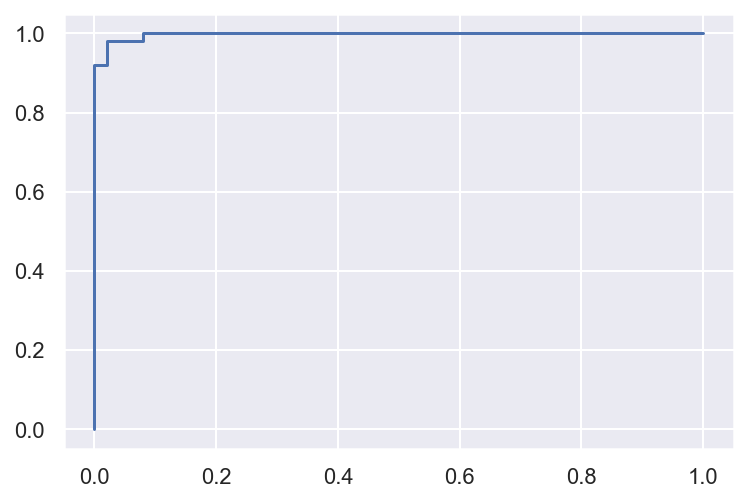

In [176]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(iris_df.target, result_iris.predict(iris_df))
plt.plot(fpr, tpr)
plt.show()

In [177]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9972000000000001

해답

In [170]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df = df[df.species.isin([1, 2])]
df["species"] -= 1
df = df.rename(
    columns={
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width",
    }
)

import statsmodels.api as sm

model = sm.Logit.from_formula(
    "species ~ sepal_length + sepal_width + petal_length + petal_width", 
    data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                  0.9142
Time:                        20:51:14   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.465

In [171]:
y_pred = result.predict(df) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(df.species, y_pred)

array([[49,  1],
       [ 1, 49]])

In [172]:
from sklearn.metrics import classification_report

print(classification_report(df.species, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



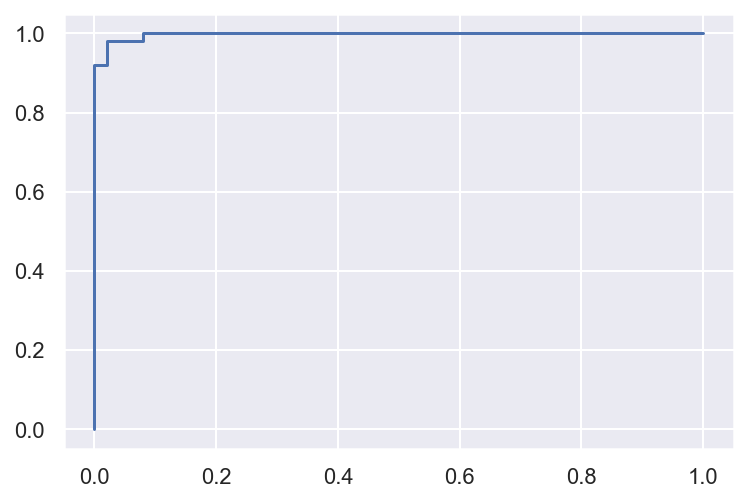

In [173]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df.species, result.predict(df))
plt.plot(fpr, tpr)
plt.show()

In [174]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9972000000000001

### 로지스틱 회귀를 사용한 회귀분석

로지스틱 회귀는 분류문제뿐만 아니라 종속변수 $y$가 0부터 1까지 막혀있는 회귀분석 문제에도 사용할 수 있다. 이때는 다음처럼 $\mu$ 값을 종속변수 y의 예측값으로 사용한다.

$$ \hat{y} = \mu(x) $$

만약 실제 y의 범위가 0부터 1이 아니면 스케일링을 통해 바꿔야 한다.

즉, 꼭 0과 1 사이일 필요도 없다. 시작과 끝만 알고 있으면 0과 1 사이로 스케일링을 해주면 된다. 

이렇게 회귀분석을 하면 뭐가 좋을까? <br>
선형회귀는 예측할 때, y가 무한대가 되니깐 100점이 끝인데 예측값이 110점이 되버리거나 이런 경우가 엄청 많다.<br>
예측값 자체가, 0과 100사이를 애초에 벗어나지 않게 하는게 좋겠지. 

비율 예측이나 점수 예측 등에서 이렇게 엄청 많이 쓴다. 

사용 방법은 엄청 쉽다. 지금까지, y에 애초에 0 or 1만 넣었잖아. <br>
그것을 0,1말고 다른 그 사잇값들을 넣어주면 돼. 

#### 예제

***지금은 데이터 자체가 0~1 사이라서 스케일링 따로 안한건데, 다른거면 y를 0-1 사이로 수동으로 스케일링 해 줘야 한다.***

다음 데이터는 1974년도에 "여성은 가정을 보살피고 국가를 운영하는 일은 남자에게 맡겨두어야 한다."라는 주장에 대한 찬성, 반대 입장을 조사한 결과이다. 각 열은 다음을 뜻한다. 

* `education`: 교육 기간
* `sex`: 성별
* `agree`: 찬성 인원
* `disagree`: 반대 인원
* `ratio`: 찬성 비율

In [178]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


교육을 많이 받은 사람일수록 찬성 비율이 감소하는 것을 볼 수 있다.

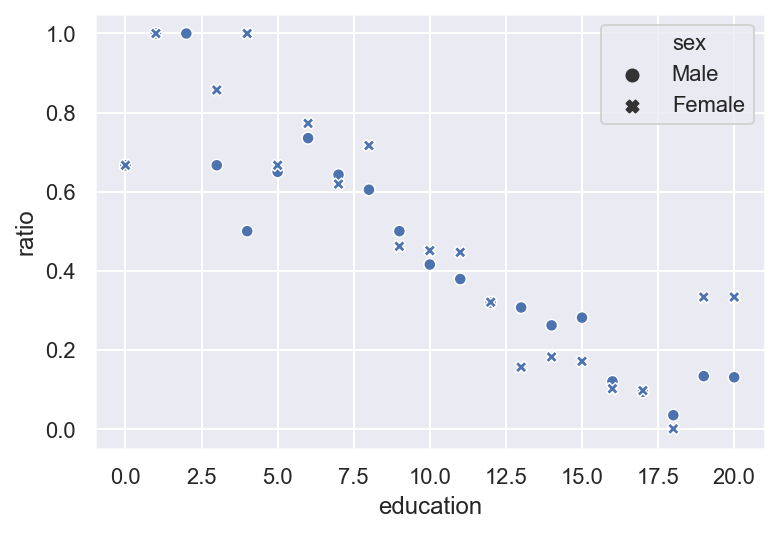

In [179]:
sns.scatterplot(x="education", y="ratio", style="sex", data=df_wrole)
plt.grid(True)
plt.show()

교육 많이 받은 사람일수록 더 반대하는 것을 볼 수 있다. 

하고자 하는 것은 교육 기관과 성별에 대해서 ratio가 어떻게 나오는지를 예측하고 싶다. 

분석 결과는 다음과 같다.

In [180]:
# 지금 reduced form으로 원핫인코딩 되어 있는것. 
# 여성보다 남성일때, 남성이 -0.1968 된다는 것. 

model_wrole = sm.Logit.from_formula("ratio ~ education + sex", df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                  0.3435
Time:                        20:59:19   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

성별은 유의하지 않다는 것을 알게되었으므로 성별을 제외하고 다시 모형을 구한다.

In [181]:
model_wrole2 = sm.Logit.from_formula("ratio ~ education", df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                  0.3422
Time:                        21:00:10   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

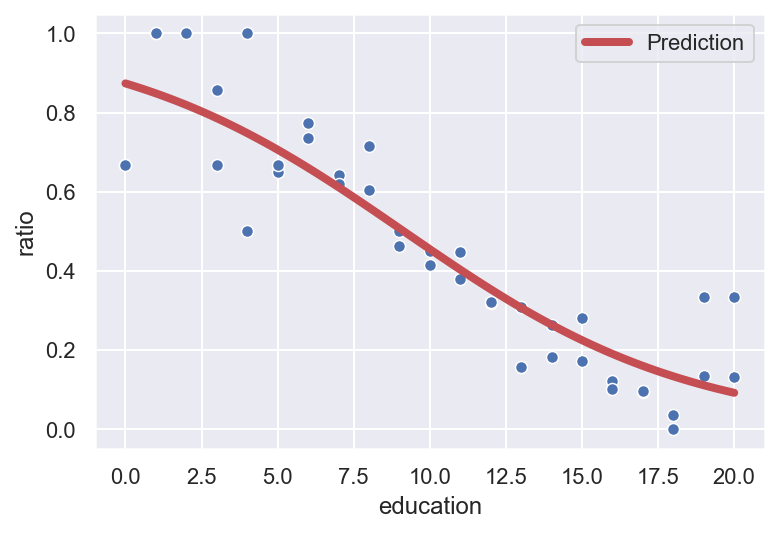

In [185]:
sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4, label="Prediction")
plt.legend()
plt.show()

이 경우 성능측정은?

$$ G^2 = 2\sum_{i=1}^N \left( y_i\log\dfrac{y_i}{\hat{y}_i} + (1-y_i)\log\dfrac{1-y_i}{1-\hat{y}_i} \right) $$

이거 똑같아. 왜냐면, perfect하게 0.7로 맞췄다고 생각 해보면, 두 term 모두 0이 되잖아. 

In [186]:
# 연습문제 1 답

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X0 = iris.data[idx, :1]
X = sm.add_constant(X0)
y = iris.target[idx]

In [ ]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

In [ ]:
logit_res.params

In [ ]:
-logit_res.params[0] / logit_res.params[1]

In [ ]:
y_pred = logit_res.predict(X) >= 0.5

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

In [ ]:
plt.plot(logit_res.fittedvalues, "ro-")
plt.plot(y_pred, "bs-")

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)

plt.plot(fpr, tpr, 'o-')
plt.show()

In [ ]:
# 연습문제 2 답

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X0 = pd.DataFrame(iris.data[idx, :], columns=iris.feature_names[:])
X = sm.add_constant(X0)
y = iris.target[idx] - 1

In [ ]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=1)
print(logit_res.summary())

In [ ]:
y_pred = logit_res.predict(X) >= 0.5

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))